# Лабораторная работа №10. Линейные стационарные системы

### Лодочникова Владлена. Группа №5130901/10202

### Упражнение 10.1

В разделе "Системы и свептка" свертка описана как сумма сдвинутых и масштабированных копий сигнала.

В разделе “Акустическая характеристика” умножение ДПФ сигнала на передаточную функцию соответсвует круговой свертке, но в предположении периодичности сигнала.В результате можно заметить, что на выходе в начале фрагмента слышна лишния нота, “затекшая” из конца этого фрагмента. 

Если перед вычислением ДПФ добавить достаточно нулей в конец сигнала, эффекта “заворота” можно избежать.

Изменим пример в chap10.ipynb и убедимся, что дополнение нулями устраняет лишнюю ноту в начале фрагмента. 

Напишем пример, где слышна постоянно посторонняя нота.  

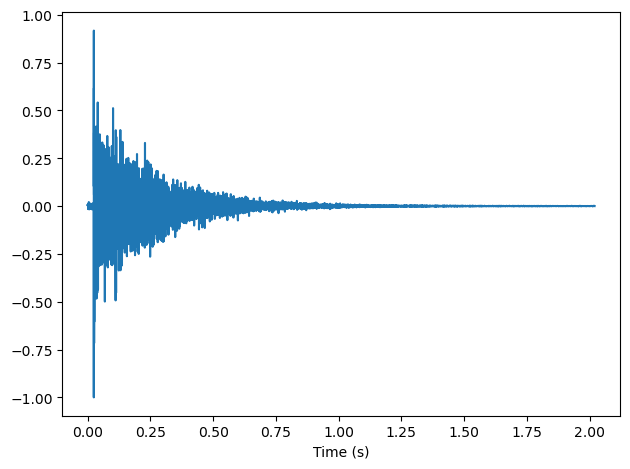

In [1]:
from thinkdsp import read_wave
from thinkdsp import decorate

response = read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

ДПФ (спектр) responce представляет собой отклик комнаты.

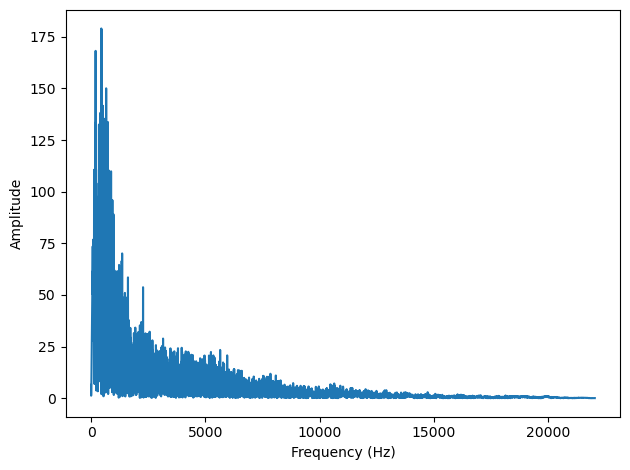

In [2]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Прослушаем исходный звук виолончели.

In [3]:
violin = read_wave('92002__jcveliz__violin-origional.wav')
violin.make_audio()

Для применения условий комнаты к звуку виолончели, первым делом нам нужно обрезать звук до длины выстрела.

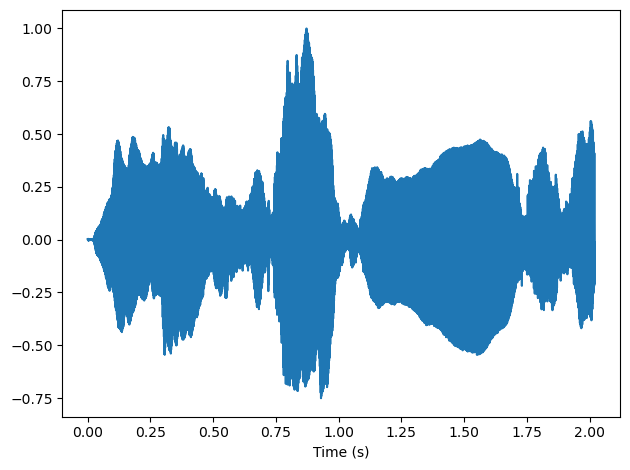

In [4]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(len(response))
violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

Получим спектр: 

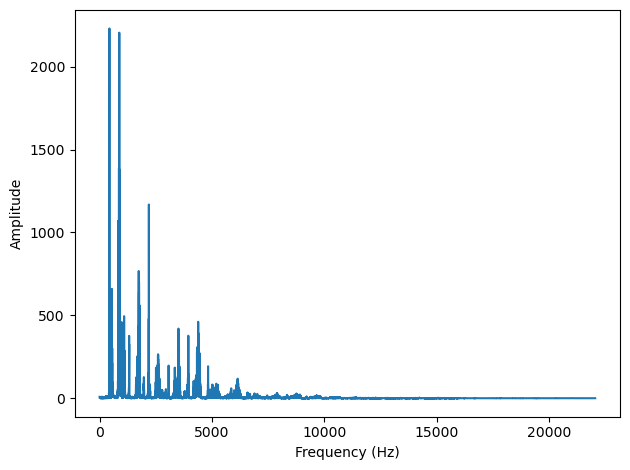

In [5]:
spectrum = violin.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Применим условия.

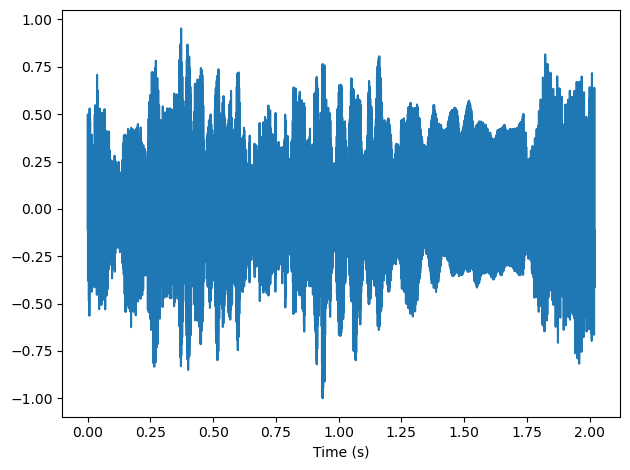

In [6]:
output = (spectrum * transfer).make_wave()
output.normalize()

output.plot()
decorate(xlabel='Time (s)')

Можно заметить из графика, что звук стал другой. 

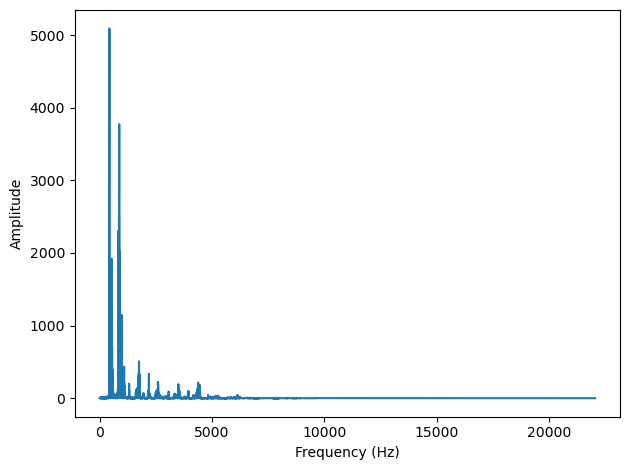

In [7]:
spectrum = output.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Из графика видно, что спектр тоже изменился. 

In [8]:
output.make_audio()

В начале аудиозаписи на короткое время звучит посторонний звук. Это происходит из-за того, что умножение ДПФ сигнала на передаточную функцию эквивалентно круговой свертке, которая предполагает периодичность сигнала. Однако наш сигнал не является периодическим, поэтому в начало случайно попадает звук с конца фрагмента. Попробуем устранить этот посторонний звук. Для этого можно добавить дополнительные нули в конец сигнала, чтобы в начале на некоторое время был нулевой уровень и не было постороннего звука.

Ограничим количество импульсов до 2^16 и расширим до 2^17, заполнив нулями.

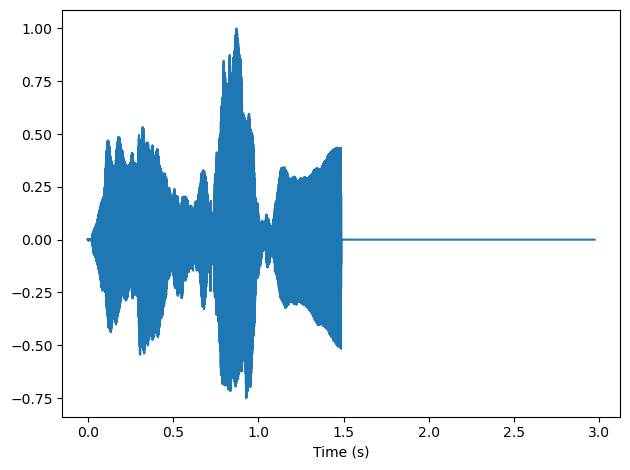

In [9]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

Выполним ДПФ:

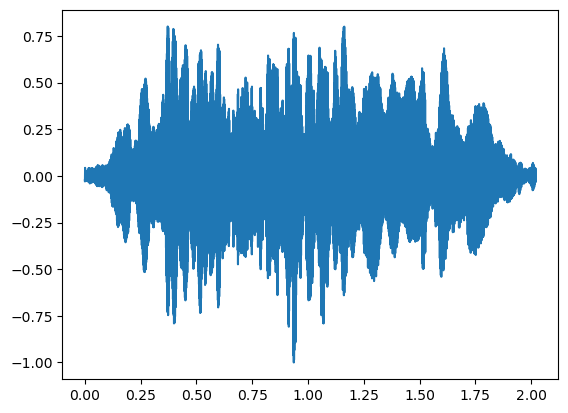

In [10]:
violin.truncate(len(response))
spectrum = violin.make_spectrum()
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()

Прослушаем: 

In [11]:
output.make_audio()

Можно убедиться, что посторонняя нота больше не слышна.

### Упражнение 10.2

Библиотека Open AIR (свободный эфир) - это "централизованный онлайн-ресурс для тех, кто интерисуется аурализацией и данными акустической импульсной характеристики". Найдем звучание.

Смоделируем двумя способами звучание записи в том пространстве, где была измерина импульсная характеристика, как сверткой самой записи с импульсой характеристикой, как и умножением ДПФ записи на вычисленный фильтр, соответствующий импульсной характеристике. 

Послушаем скаченный звук. Взятый звук Центральный зал Йоркского университета. 

In [12]:
response = read_wave('code_stalbans_a_mono.wav')
response.make_audio()

Распечатаем:

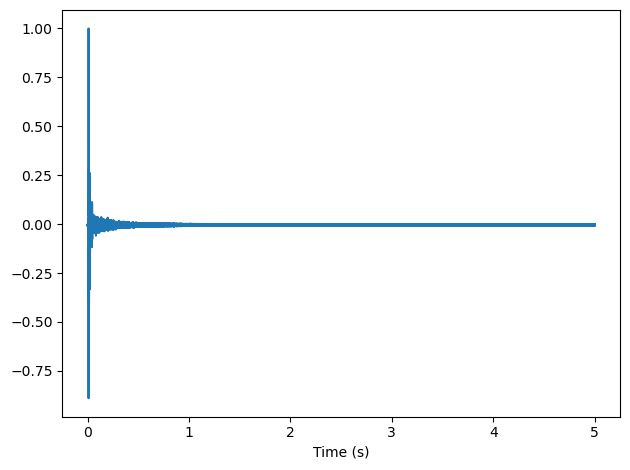

In [13]:
start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

Аналогичным образом, как и в предыдущем пункте, мы вычислим передаточную функцию, используя ДПФ response.

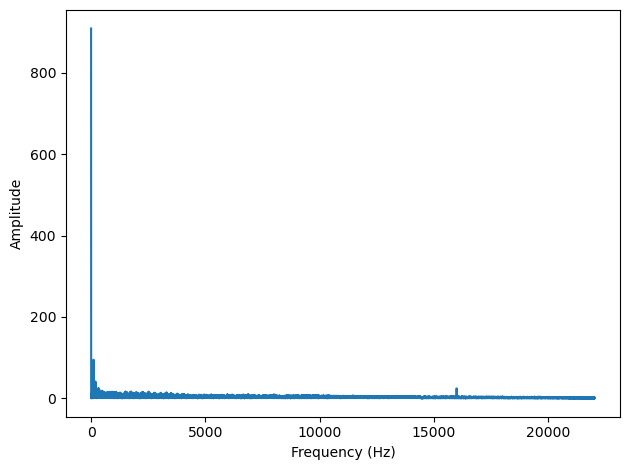

In [14]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Теперь выберем звук, на который будут накладываться условия комнаты. 
Распечатаем его.

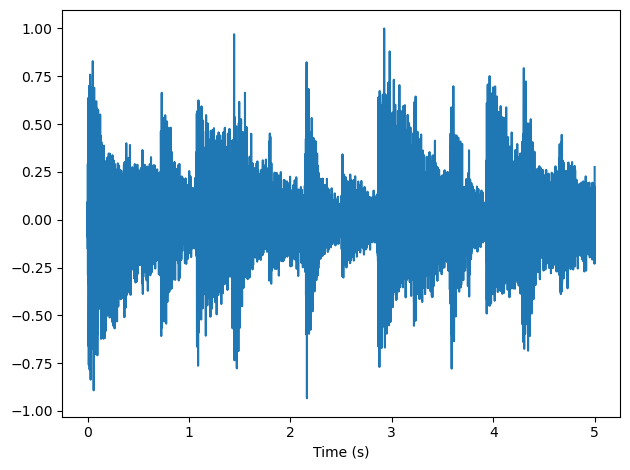

In [15]:
wave = read_wave('electronic-motivational-bpm-84-loop.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

In [16]:
wave.make_audio()

Посмотрим на спектр:

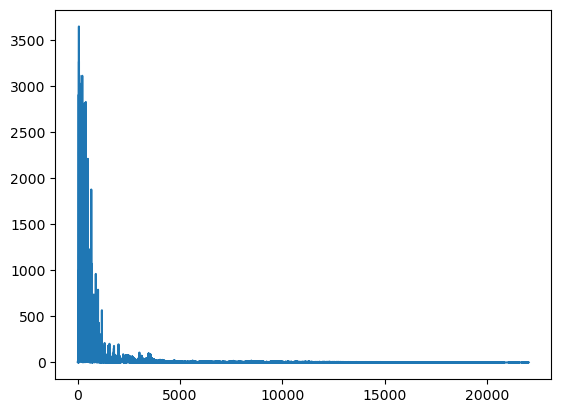

In [17]:
spectrum = wave.make_spectrum()
spectrum.plot()

In [18]:
 
len(spectrum.hs), len(transfer.hs)

(110251, 110251)

In [19]:
spectrum.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

In [20]:
transfer.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

Наложим условия комнаты.

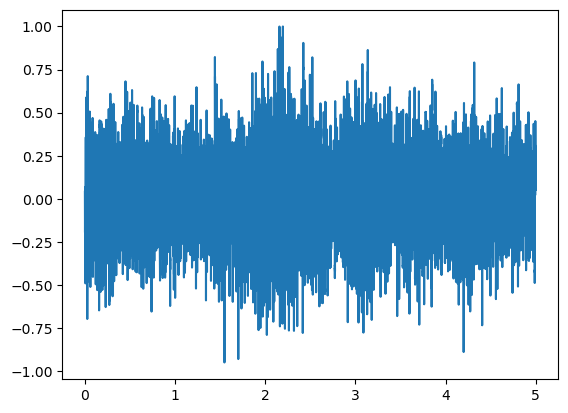

In [21]:
output = (transfer * spectrum).make_wave()
output.normalize()
output.plot()



In [23]:
output.make_audio()

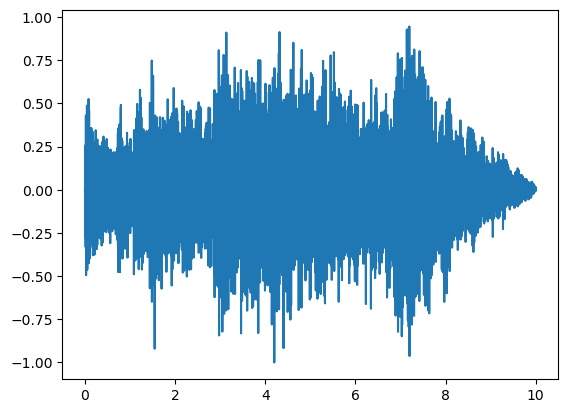

In [25]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.plot()


In [26]:
convolved2.make_audio()

В обоих аудио слышно эхо. Результаты получились одинаковыми. 